<a href="https://colab.research.google.com/github/suhasAB/TF2/blob/master/TF2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import  load_breast_cancer

In [ ]:
data=load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(data.data,data.target,test_size=0.33)

In [ ]:
N,D= X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=tf.keras.models.Sequential(
    [
     tf.keras.layers.Input(shape=(D,)),
     tf.keras.layers.Dense(1,activation='sigmoid')     
    ])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 42ms/step - loss: 1.0677 - accuracy: 0.2569 - val_loss: 1.0030 - val_accuracy: 0.3032
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0038 - accuracy: 0.3289 - val_loss: 0.9099 - val_accuracy: 0.3936
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8975 - accuracy: 0.4028 - val_loss: 0.8277 - val_accuracy: 0.4574
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8004 - accuracy: 0.4845 - val_loss: 0.7567 - val_accuracy: 0.5319
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7661 - accuracy: 0.5611 - val_loss: 0.6915 - val_accuracy: 0.6170
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.6139 - val_loss: 0.6380 - val_accuracy: 0.6702
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6144 - accuracy: 0.6503 - val_loss: 0.5906 - val_accuracy: 0.7128
Epoch 8/100


In [ ]:
print("training score: ",model.evaluate(X_train,y_train))

12/12 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9764
training score:  [0.10151559859514236, 0.9763779640197754]


In [ ]:
print("testing score:",model.evaluate(X_test,y_test))

6/6 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9681
testing score: [0.11567570269107819, 0.9680851101875305]


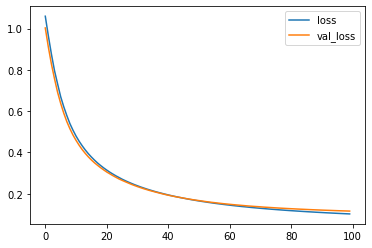

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

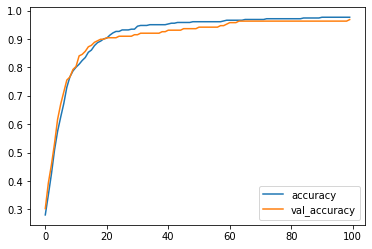

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();